In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df = df.values

In [4]:
x = df[:,1:]
y = df[:,0]

In [5]:
# Train test split
split = int(0.8*x.shape[0])


In [6]:
train_x = x[:split,:]
train_y = y[:split]
test_x = x[split:,:]
test_y = y[split:]

In [7]:
# Visualise some samples

In [8]:
def drawImage(sample):
    
    # reshape that image
    img = sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

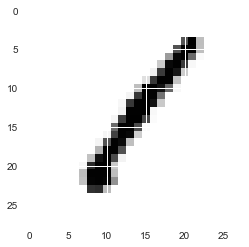

1


In [9]:
drawImage(train_x[0])
print (train_y[0])

In [10]:
def distance(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [11]:
# K-NN Algorithm
def knn(x, y, querypoint, k=5):
    
    # Pick K Nearest Neighbours
    
    vals = []
    
    # for every point in the x
    for i in range(x.shape[0]):
        
        # Compute distance
        d = distance(querypoint, x[i])
        vals.append((d, y[i]))
    
    # 2. Sort the array and find K Nearest point
    vals = sorted(vals)
    vals = vals[:k]
    
    # Majority vote
    
    vals = np.array(vals)
    
    new_values = np.unique(vals[:,1], return_counts=True)
    
    # Index of maximum count
    index = new_values[1].argmax()
    
    # Map this index with my data
    
    pred = new_values[0][index]
    
    return pred

In [12]:
# Make predictions over test image
    
pred = knn(train_x, train_y, test_x[4])

In [13]:
pred

2.0

In [14]:
print(test_y[4])

2


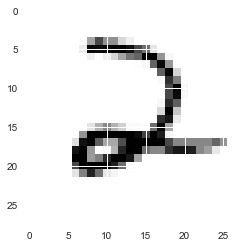

In [15]:
drawImage(test_x[4])

In [16]:
def get_acc(x_tst,y_tst, x_trn, y_trn):
   
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = knn(train_x, train_y, x_tst[i])
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [ ]:
acc = []
for i in range(100):
    acc.append(get_acc(test_x, test_y, train_x , train_y))
print (acc[-1])